In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# définition les noms des colonnes
colonnes = ['target', 'ids', 'date', 'flag', 'user', 'text']

In [3]:
# Ouverture du fichier
data_full = pd.read_csv("./data/training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1', header=None, names=colonnes)

In [4]:
# A REFAIRE DANS UN NOTEBOOK SEPARE SUR XPS
# import pandas as pd
# import gensim
# from gensim import corpora
# from gensim.models import CoherenceModel
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer, SnowballStemmer
# import nltk
# import re

# # Télécharger les ressources nécessaires de NLTK
# nltk.download('stopwords')
# nltk.download('wordnet')

# # Charger les données

# texts = data_full['text'].values

# # Prétraitement des données
# stop_words = set(stopwords.words('english'))
# stemmer = SnowballStemmer('english')

# def preprocess(text):
#     result = []
#     for token in gensim.utils.simple_preprocess(text):
#         if token not in stop_words and len(token) > 3:
#             result.append(stemmer.stem(WordNetLemmatizer().lemmatize(token, pos='v')))
#     return result

# processed_texts = [preprocess(text) for text in texts]

# # Créer un dictionnaire et un corpus
# dictionary = corpora.Dictionary(processed_texts)
# corpus = [dictionary.doc2bow(text) for text in processed_texts]

# # Déterminer le nombre optimal de topics
# def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
#     coherence_values = []
#     model_list = []
#     for num_topics in range(start, limit, step):
#         model = gensim.models.LdaModel(corpus=corpus,
#                                        id2word=dictionary,
#                                        num_topics=num_topics,
#                                        random_state=100,
#                                        update_every=1,
#                                        chunksize=100,
#                                        passes=10,
#                                        alpha='auto',
#                                        per_word_topics=True)
#         model_list.append(model)
#         coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
#         coherence_values.append(coherencemodel.get_coherence())
#     return model_list, coherence_values

# model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_texts, start=2, limit=40, step=6)

# # Sélectionner le modèle avec la meilleure cohérence
# optimal_model = model_list[coherence_values.index(max(coherence_values))]

# # Afficher les topics
# topics = optimal_model.print_topics(num_words=10)
# for topic in topics:
#     print(topic)

# # Détecter le topic traitant des voyages en avion
# def find_air_travel_topic(model, dictionary):
#     for idx, topic in model.print_topics(-1):
#         if 'flight' in topic or 'airline' in topic or 'airport' in topic:
#             print(f"Topic {idx}: {topic}")

# find_air_travel_topic(optimal_model, dictionary)


In [5]:
import pandas as pd
import re

# Liste de mots-clés spécifiques au domaine de l'aviation
# Liste améliorée de mots-clés spécifiques au domaine de l'aviation
keywords = [
    'flight', 'airline', 'plane', 'airport', 'boarding', 'delay', 'baggage', 
    'crew', 'steward', 'check-in', 'boarding pass', 'gate', 'luggage', 'landed'
    'overbooked', 'turbulence', 'landing', 'takeoff', 'in-flight', 'cabin crew', 
    'air hostess', 'air steward', 'seatbelt', 'emergency exit', 'runway', 
    'air traffic control', 'lost baggage', 'missed connection', 'upgrade', 
    'frequent flyer', 'mileage', 'layover', 'diverted', 'grounded'
]

# Construire une expression régulière pour correspondre uniquement aux mots entiers
pattern = r'\b(?:' + '|'.join(keywords) + r')\b'

# Filtrer les tweets contenant les mots-clés
data_filtered = data_full[data_full['text'].str.contains(pattern, case=False, na=False, regex=True)]

# Exclure les tweets contenant des mots indésirables
exclude_pattern = r'\b(?:screwed|screw)\b'
data_filtered = data_filtered[~data_filtered['text'].str.contains(exclude_pattern, case=False, na=False, regex=True)]

# Nombre de tweets spécifiques au domaine des voyages aériens
print("Le dataset contient", data_filtered.shape[0], "tweets relatifs au transport aérien")


Le dataset contient 9460 tweets relatifs au transport aérien


In [6]:
import pandas as pd

# Supposons que votre DataFrame s'appelle 'data'
# Filtrer les lignes avec target=0 et target=4
target_0 = data_filtered[data_filtered['target'] == 0]
target_4 = data_filtered[data_filtered['target'] == 4]

# Trouver le nombre minimum de lignes entre les deux groupes
min_count = min(len(target_0), len(target_4))

# Échantillonner un nombre égal de lignes de chaque groupe
sampled_target_0 = target_0.sample(n=min_count, random_state=42)
sampled_target_4 = target_4.sample(n=min_count, random_state=42)

# Combiner les échantillons
data = pd.concat([sampled_target_0, sampled_target_4])

# Nombre de tweets spécifiques au domaine des voyages aériens
print("Le dataset équilibré contient", data.shape[0], "tweets")

Le dataset équilibré contient 6588 tweets


In [7]:
# Ajuster la largeur maximale des colonnes
pd.set_option('display.max_colwidth', None)
data.sample(20)

,target,ids,date,flag,user,text
600404,0,2220898862,Thu Jun 18 04:14:33 PDT 2009,NO_QUERY,Graeme_Skinner,Tried and failed to upgrade our Sky package it's certainly a case of #skyfail
857370,4,1573928006,Tue Apr 21 03:30:50 PDT 2009,NO_QUERY,NickHodge,"@eskimo_sparky when msft kicks me outta teh plane bcoz I cross the line, I will be knocking on teh Happener door. Nowhere else"
87436,0,1754469346,Sun May 10 06:22:44 PDT 2009,NO_QUERY,javiermerchan,Getting ready to go to the airport. I don't want to come back to Madrid
1406851,4,2055417293,Sat Jun 06 09:16:39 PDT 2009,NO_QUERY,schleppydotnet,Filled up the Versys and calculated my fuel mileage for the first time: 47mpg. Not too shabby
1559129,4,2185990803,Mon Jun 15 18:11:57 PDT 2009,NO_QUERY,RichRuh,@crazyzoltar No reason needed. Got room in your luggage for some more?
1257981,4,1997812880,Mon Jun 01 17:30:05 PDT 2009,NO_QUERY,the_beth,"@SWA_Captain @southwestAir Another perfect landing and early arrival! //i wanna fly w/you, ken. i will. one day. i'm gonna. i am."
653751,0,2239043549,Fri Jun 19 08:03:42 PDT 2009,NO_QUERY,Lacheln,Gah my sisters flight is being delayed even more now we only get to hang out a few days!
642149,0,2235419947,Fri Jun 19 01:10:07 PDT 2009,NO_QUERY,ScoobyMad88,"Didn't sleep well. Bad dreams! iPhone 3GS out today, any fool paying through the nose to upgrade?;)"
1326317,4,2015245237,Wed Jun 03 04:07:35 PDT 2009,NO_QUERY,JonoH,New Flight Control! new airports available.
1494532,4,2069714155,Sun Jun 07 16:23:29 PDT 2009,NO_QUERY,DaveHamilton,"Small favors: on a full flight, it seems I have an aisle with one of the only free middle seats. let's hope it stays that way."


In [8]:
print("Exemples de tweets négatifs")
display(data[data["target"] == 0]["text"])

Exemples de tweets négatifs


364415    Bought a book to read on the plane. &quot;Smashed&quot;. So far, it sounds an awful lot like my childhood. I may not be able to get thru it. 
61776                                                                Waiting at the airport with the hubby this morning. 1 hour till his flight leaves 
307389                                                         OH WOW FAIL. My thoughts are with all those of the Air France flight and their families 
764377                                                                                                         Off to the airport!  Dallas here I come!
337691       Broke my iPhone tonight from slipping pedals landing on the seat from a tailwhip. my phone was in my back pocket.  iPhones are shitty!!!!!
                                                                              ...                                                                      
326176                                                            CNN: Brazil confirms p

In [9]:
print("Exemples de tweets positifs")
display(data[data["target"] == 4]["text"])

Exemples de tweets positifs


1549419                                                                                                       has free airline money to spend.. yay! 
1568381    @lilyroseallen You must be really tired from all that flying and listening to children screaming. You deserve to have your own plane. LOL 
1550095                 @dhempe, just saw your question, sorry for the delay! I can give you a coupon code for a free guide! DM me with your details 
1278372                                                                            @LisaLavie next time he should give out free plane tickets aswell 
1392424                                                                          About to board my 1st flight to St. Louis. Trying not to be nervous 
                                                                              ...                                                                    
1069056                                                          I'm chillen at the airport waiting 

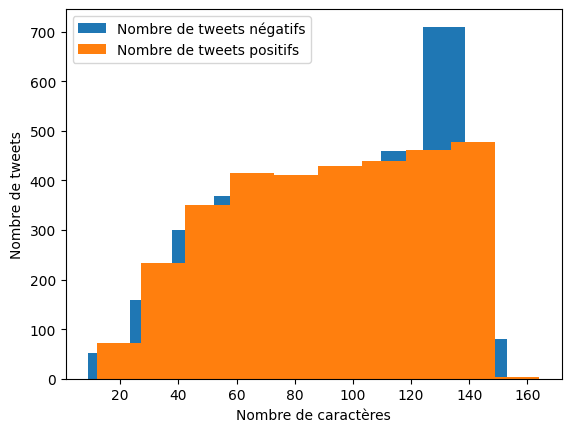

In [10]:
# Longueur des tweets
length_text_pos = data[data["target"] == 4]["text"].str.len()
length_text_neg = data[data["target"] == 0]["text"].str.len() 
plt.hist(length_text_neg, label="Nombre de tweets négatifs") 
plt.hist(length_text_pos, label="Nombre de tweets positifs") 
plt.xlabel("Nombre de caractères")
plt.ylabel("Nombre de tweets")
plt.legend() 
plt.show()

Ce sont des contenus typiques de tweets: citation (@), liens, utilisation d'abbréviations et de variations d'orthographe, ponctuation pour exprimer les sentiments <br>


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6588 entries, 364415 to 1570686
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  6588 non-null   int64 
 1   ids     6588 non-null   int64 
 2   date    6588 non-null   object
 3   flag    6588 non-null   object
 4   user    6588 non-null   object
 5   text    6588 non-null   object
dtypes: int64(2), object(4)
memory usage: 360.3+ KB


In [12]:
data.nunique()

target       2
ids       6582
date      6543
flag         1
user      6279
text      6562
dtype: int64

In [13]:
print(data.isna().sum())

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64


In [14]:
for col in data.columns:
    n = data.duplicated(subset=col).sum()
    print(f'col : {col} -> duplicated : {n}')

col : target -> duplicated : 6586
col : ids -> duplicated : 6
col : date -> duplicated : 45
col : flag -> duplicated : 6587
col : user -> duplicated : 309
col : text -> duplicated : 26


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Trouver les doublons basés sur la colonne 'ids'
duplicates = data[data.duplicated(subset=['ids'], keep=False)]
display(duplicates.sort_values(by="ids"))

# Groupby sur 'ids' et additionner les valeurs de 'target'
grouped_data = duplicates.groupby('ids')['target'].sum().reset_index()

# Afficher les valeurs uniques de la colonne 'target'
unique_values = grouped_data['target'].unique()
print("Valeurs uniques de la colonne 'target' :", unique_values)


,target,ids,date,flag,user,text
42578,0,1676160753,Fri May 01 21:15:30 PDT 2009,NO_QUERY,littletigr,@aneetasee no not after that plane ticket BUT I'm super excited to see the fam after three years
859693,4,1676160753,Fri May 01 21:15:30 PDT 2009,NO_QUERY,littletigr,@aneetasee no not after that plane ticket BUT I'm super excited to see the fam after three years
235348,0,1979765929,Sun May 31 04:25:06 PDT 2009,NO_QUERY,lasic,"@jabogan LOL, why creepy? ok with me... bummer, school Moodle is down prob'ly due to upgrade at DET this w'end - back Tue, sorry"
1164524,4,1979765929,Sun May 31 04:25:06 PDT 2009,NO_QUERY,lasic,"@jabogan LOL, why creepy? ok with me... bummer, school Moodle is down prob'ly due to upgrade at DET this w'end - back Tue, sorry"
316351,0,2002387780,Tue Jun 02 04:03:52 PDT 2009,NO_QUERY,SilviaEmilia,"flying back to Germany today..already miss home feels like I am going to cry until boarding time...well, see u tomorrow"
1287627,4,2002387780,Tue Jun 02 04:03:52 PDT 2009,NO_QUERY,SilviaEmilia,"flying back to Germany today..already miss home feels like I am going to cry until boarding time...well, see u tomorrow"
379890,0,2052444682,Sat Jun 06 00:45:08 PDT 2009,NO_QUERY,ReMisterGeneral,@ChrissyMBot no tetleys at the airport I shall have to sample 'american breakfast tea'. Heaven forbid
1382193,4,2052444682,Sat Jun 06 00:45:08 PDT 2009,NO_QUERY,ReMisterGeneral,@ChrissyMBot no tetleys at the airport I shall have to sample 'american breakfast tea'. Heaven forbid
442028,0,2067161979,Sun Jun 07 11:51:35 PDT 2009,NO_QUERY,Morenah08,"I'll go Skate Boarding Down My House! But...I'm sad, One person isn't with me now! s2"
1481909,4,2067161979,Sun Jun 07 11:51:35 PDT 2009,NO_QUERY,Morenah08,"I'll go Skate Boarding Down My House! But...I'm sad, One person isn't with me now! s2"


Valeurs uniques de la colonne 'target' : [4]


En faisant la somme des target sur les lignes en doublons on a uniquement la valeur "4" ce qui veut dire que c'est le résultat de 0+4 donc ce sont des tweets qui sont identiques mais ont été jugés à la fois positifs et négatifs, autant les supprimer.

In [16]:
# Trouver les doublons basés sur toutes les colonnes sauf 'target'
duplicates = data[data.duplicated(subset=['ids', 'date', 'flag', 'user', 'text'], keep=False)]

# Supprimer les doublons
data = data.drop(duplicates.index)

In [17]:
# Trouver les doublons basés sur les colonnes date, flag, user, text, et target
duplicates_text_target = data[data.duplicated(subset=['date', 'flag', 'user', 'text', 'target'], keep=False)]
data = data.drop_duplicates(subset=['date', 'flag', 'user', 'text', 'target'], keep='first')
duplicates_text_target

,target,ids,date,flag,user,text
291475,0,1995715901,Mon Jun 01 13:56:04 PDT 2009,NO_QUERY,carolsantini,well i'm feeling sad for the family of who were in Air France plane that disappear im so sorry !
291477,0,1995715937,Mon Jun 01 13:56:04 PDT 2009,NO_QUERY,carolsantini,well i'm feeling sad for the family of who were in Air France plane that disappear im so sorry !
1418769,4,2057837639,Sat Jun 06 13:45:25 PDT 2009,NO_QUERY,PastorJonCannon,"Monitor at Chicago aiport says my flight to Raliegh, NC is &quot;on time&quot; - pray that it stays that way!"
1418768,4,2057837598,Sat Jun 06 13:45:25 PDT 2009,NO_QUERY,PastorJonCannon,"Monitor at Chicago aiport says my flight to Raliegh, NC is &quot;on time&quot; - pray that it stays that way!"


In [18]:
# Trouver les doublons basés sur les colonnes flag, user, text
duplicates_text_user = data[data.duplicated(subset=['flag', 'user', 'text'], keep=False)]
duplicates_text_user

,target,ids,date,flag,user,text
1372325,4,2051242027,Fri Jun 05 21:17:51 PDT 2009,NO_QUERY,PatrickAnna,http://www.twitpic.com/48mky Anna &amp; her brother Albert enjoying the view while flying without a plane...
1386767,4,2052865326,Sat Jun 06 02:19:45 PDT 2009,NO_QUERY,PatrickAnna,On the plane flying higher to jump! http://short.to/dlnc
1454778,4,2063355857,Sun Jun 07 02:19:41 PDT 2009,NO_QUERY,PatrickAnna,On the plane flying higher to jump! http://short.to/dlnc
1446052,4,2062459855,Sat Jun 06 23:17:39 PDT 2009,NO_QUERY,PatrickAnna,http://www.twitpic.com/48mky Anna &amp; her brother Albert enjoying the view while flying without a plane...
1202739,4,1985909234,Sun May 31 18:00:16 PDT 2009,NO_QUERY,PatrickAnna,Anna and her brother Albert were about to jump out of the plane... http://twitpic.com/3i493
858086,4,1574066791,Tue Apr 21 04:06:41 PDT 2009,NO_QUERY,PatrickAnna,Anna and her brother Albert were about to jump out of the plane... http://twitpic.com/3i493
845589,4,1564251142,Mon Apr 20 02:33:09 PDT 2009,NO_QUERY,PatrickAnna,On the plane flying higher to jump! http://twitpic.com/3i44g
846153,4,1564349281,Mon Apr 20 03:03:08 PDT 2009,NO_QUERY,PatrickAnna,On the plane flying higher to jump! http://twitpic.com/3i44g


In [19]:
# Groupby sur 'ids' et additionner les valeurs de 'target'
grouped_data = duplicates_text_user.groupby('text')['target'].sum().reset_index()

# Afficher les valeurs uniques de la colonne 'target'
unique_values = grouped_data['target'].unique()
print("Valeurs uniques de la colonne 'target' :", unique_values)

Valeurs uniques de la colonne 'target' : [8]


Certains messages sont répétés un grand nombre de fois, ça peut fausser l'analyse.

In [20]:
# Supprimer les doublons
data = data.drop(duplicates_text_user.index)

In [21]:
# Trouver les doublons basés sur les colonnes text
duplicates_text = data[data.duplicated(subset=['text'], keep=False)]
duplicates_text

,target,ids,date,flag,user,text
307389,0,2000460643,Mon Jun 01 22:09:58 PDT 2009,NO_QUERY,rachelslott,OH WOW FAIL. My thoughts are with all those of the Air France flight and their families
319656,0,2003104662,Tue Jun 02 05:53:18 PDT 2009,NO_QUERY,houseplanet,AIR FRANCE FLIGHT 447 --Brazilian Air Force confirms a plane seat was found 650km NE of Fernando de Noronha
202006,0,1972027290,Sat May 30 08:24:29 PDT 2009,NO_QUERY,jediabe,On my way to the airport
14963,0,1553925555,Sat Apr 18 15:35:18 PDT 2009,NO_QUERY,Andrestwoo,Grounded
233890,0,1979467276,Sun May 31 03:10:20 PDT 2009,NO_QUERY,BeebaDiva,On my way to the airport
770027,0,2301851016,Tue Jun 23 15:59:59 PDT 2009,NO_QUERY,benbrochill,Going to mcdonalds. I miss annet and the crew.
770066,0,2301863291,Tue Jun 23 16:00:51 PDT 2009,NO_QUERY,Adolfh71,Going to mcdonalds. I miss annet and the crew.
319863,0,2003152114,Tue Jun 02 05:59:15 PDT 2009,NO_QUERY,jacobowsky,AIR FRANCE FLIGHT 447 --Brazilian Air Force confirms a plane seat was found 650km NE of Fernando de Noronha
401717,0,2057746687,Sat Jun 06 13:35:05 PDT 2009,NO_QUERY,123fund,At the airport.
475933,0,2177742119,Mon Jun 15 06:37:38 PDT 2009,NO_QUERY,zacharypatchan,on the way to the airport


In [22]:
# Groupby sur 'text' et calculer l'écart type sur les valeurs de 'target'
grouped_data = duplicates_text_user.groupby('text')['target'].std().reset_index()

In [23]:
grouped_data.target.unique()

array([0.])

Text(0.5, 1.0, 'Histogramme des valeurs de Target et de leurs fréquences')

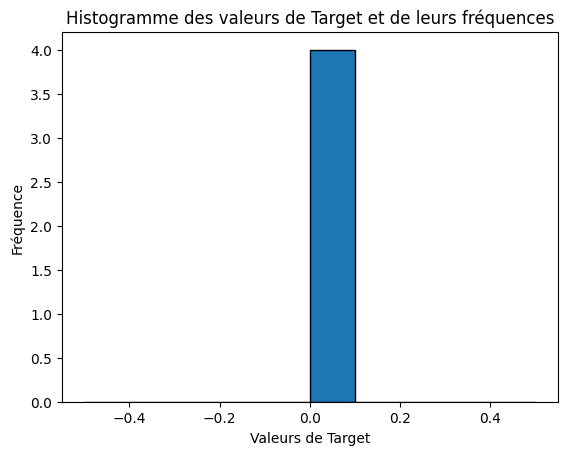

In [24]:
import matplotlib.pyplot as plt

# Créer un histogramme des valeurs de grouped_data.target
plt.hist(grouped_data['target'], bins=10, edgecolor='black')

# Ajouter des labels et un titre
plt.xlabel('Valeurs de Target')
plt.ylabel('Fréquence')
plt.title('Histogramme des valeurs de Target et de leurs fréquences')

In [25]:
# Filtrer les textes dans grouped_data où target n'est pas nul
non_zero_texts = grouped_data[grouped_data['target'] != 0]['text']

# Supprimer les lignes dans data où 'text' est dans non_zero_texts
data = data[~data['text'].isin(non_zero_texts)]

La valeur de 4 porte à confusion, on va changer pour 1

In [26]:
# Remplacer la valeur 4 par 1 dans la colonne 'target'
data['target'] = data['target'].replace(4, 1)

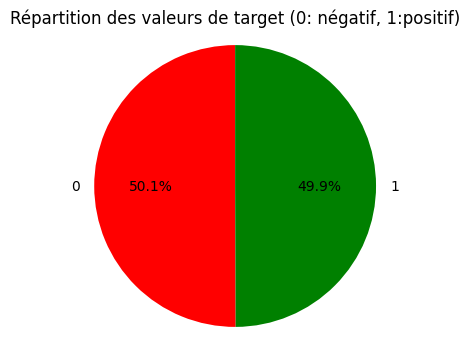

In [27]:
# Répartition des valeurs de la colonne 'target'
repartition_target = data['target'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(repartition_target, labels=repartition_target.index, autopct='%1.1f%%', colors=['red', 'green'], startangle=90)
plt.title('Répartition des valeurs de target (0: négatif, 1:positif)')
plt.axis('equal')  # Pour s'assurer que le pie chart est bien circulaire
plt.show()

In [28]:
# Sauvegarder les tweets filtrés dans un nouveau fichier CSV
data_filtered.to_csv('./data/filtered_tweets.csv', index=True)

## Problématique métier
Le client demande de détecter les bad buzz, lors de l'appréciation de performance du modèle les faux positifs seront plus pénalisants que les faux négatifs. On s'appuiera donc sur la mesure de précision.<br>

## Exploration et nettoyage du vocabulaire

### Détection de la langue

In [30]:
# ! pip install spacy-langdetect
! python --version
# ! pip install tqdm

Python 3.12.4


In [31]:
import pandas as pd
import spacy
from spacy_langdetect import LanguageDetector
from spacy.language import Language
from tqdm import tqdm

# Fonction pour ajouter le détecteur de langue à spaCy
def get_lang_detector(nlp, name):
    return LanguageDetector()

# Charger le modèle de langue anglais
nlp = spacy.load("en_core_web_sm")

# Vérifiez si l'usine existe déjà
if "language_detector" not in nlp.pipe_names:
    Language.factory("language_detector", func=get_lang_detector)
    nlp.add_pipe('language_detector', last=True)

# Fonction pour détecter la langue
def detect_language(text):
    doc = nlp(text)
    return doc._.language['language']

# Appliquer la détection de langue avec une barre de progression
tqdm.pandas()  # Activer tqdm pour les pandas DataFrame
data['language'] = data['text'].progress_apply(detect_language)
data = data[data['language'] == 'en']

# Supprimer la colonne 'language' si elle n'est plus nécessaire
data = data.drop(columns=['language'])

data.shape


100%|█████████████████████████████████████████████████████████████████████████████| 6566/6566 [00:48<00:00, 135.40it/s]


(6469, 6)

On s'est restreint à la langue anglaise.

### Nettoyage (adapté aux tweets)

In [32]:
%time
import os
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import numpy as np
import pandas as pd
import sklearn

# Libraries and packages for text (pre-)processing 
import string
import re
import nltk

print("Python version:", sys.version)
print("Version info.:", sys.version_info)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("skearn version:", sklearn.__version__)
print("re version:", re.__version__)
print("nltk version:", nltk.__version__)

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

CPU times: total: 0 ns
Wall time: 0 ns
Python version: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Version info.: sys.version_info(major=3, minor=11, micro=7, releaselevel='final', serial=0)
pandas version: 2.1.4
numpy version: 1.24.4
skearn version: 1.4.2
re version: 2.2.1
nltk version: 3.8.1


#### Données

Nous allons tester nos fonctions sur quelques lignes sélectionnées au hasard

In [33]:
import random

# Choisir dix indices au hasard
random_indices = random.sample(range(len(data)), 10)

# Créer un DataFrame avec les lignes sélectionnées
data_sample = data.iloc[random_indices]

# Afficher les lignes sélectionnées pour vérification
pd.set_option('display.max_colwidth', None)
display(data_sample)

,target,ids,date,flag,user,text
739630,0,2265779728,Sun Jun 21 07:17:37 PDT 2009,NO_QUERY,TriciaRoark,Took Sarah to airport this morning at 5am to catch her flight to Japan. wow!... I cried so much. What will I do for 2 weeks without her.
282468,0,1992636950,Mon Jun 01 09:04:41 PDT 2009,NO_QUERY,jaimiesortino,Feels sad for those people on that plane
578618,0,2213166746,Wed Jun 17 15:01:11 PDT 2009,NO_QUERY,clearskysnet,@MyAppleStuff I'm not looking forward to this upgrade at all now hope you get it sorted...
551415,0,2203157067,Tue Jun 16 23:08:33 PDT 2009,NO_QUERY,wkanaan,"@ashadihopper Go to the Irish Village, next to gate 123 and have a beer for me *sniff*"
1154870,1,1978956402,Sun May 31 01:04:18 PDT 2009,NO_QUERY,jamillemolina,is @ Saigon International Airport awaiting our PAL flight back home.
380580,0,2052597204,Sat Jun 06 01:17:23 PDT 2009,NO_QUERY,shauna_leigh,@HereIsKG omg ur still awake...insane! Well I'm up n ready for the airport. Tired as fuck we shall tweet lata
580837,0,2214086249,Wed Jun 17 16:14:52 PDT 2009,NO_QUERY,Ingrid1609,is either booking a flight....or driving
437686,0,2065987438,Sun Jun 07 09:40:29 PDT 2009,NO_QUERY,MitchyD,"@fiddlecub Well, I SAW you plenty at E3, nestled next to the rest of the GS crew in your fishbowl war room. Never got to say Hi, though."
291052,0,1995581356,Mon Jun 01 13:43:13 PDT 2009,NO_QUERY,carlyspence,Sitting at the airport hungover with a 4 hour delay....
23879,0,1557837098,Sun Apr 19 06:13:25 PDT 2009,NO_QUERY,linseyd,just had a minor freak out at a big bug flying in the window and landing on me


In [34]:
import spacy

# Tokenisation avec Spacy# Charger le modèle de langue
nlp = spacy.load('en_core_web_sm')

# Tokeniser les textes
data_sample['tokens'] = data_sample['text'].apply(lambda x: [token.text for token in nlp(x)])

# Afficher les lignes sélectionnées et tokenisées pour vérification
pd.set_option('display.max_colwidth', None)
display(data_sample)

,target,ids,date,flag,user,text,tokens
739630,0,2265779728,Sun Jun 21 07:17:37 PDT 2009,NO_QUERY,TriciaRoark,Took Sarah to airport this morning at 5am to catch her flight to Japan. wow!... I cried so much. What will I do for 2 weeks without her.,"[Took, Sarah, to, airport, this, morning, at, 5, am, to, catch, her, flight, to, Japan, ., , wow, !, ..., I, cried, so, much, ., What, will, I, do, for, 2, weeks, without, her, .]"
282468,0,1992636950,Mon Jun 01 09:04:41 PDT 2009,NO_QUERY,jaimiesortino,Feels sad for those people on that plane,"[Feels, sad, for, those, people, on, that, plane]"
578618,0,2213166746,Wed Jun 17 15:01:11 PDT 2009,NO_QUERY,clearskysnet,@MyAppleStuff I'm not looking forward to this upgrade at all now hope you get it sorted...,"[@MyAppleStuff, I, 'm, not, looking, forward, to, this, upgrade, at, all, now, , hope, you, get, it, sorted, ...]"
551415,0,2203157067,Tue Jun 16 23:08:33 PDT 2009,NO_QUERY,wkanaan,"@ashadihopper Go to the Irish Village, next to gate 123 and have a beer for me *sniff*","[@ashadihopper, Go, to, the, Irish, Village, ,, next, to, gate, 123, and, have, a, beer, for, me, , *, sniff, *]"
1154870,1,1978956402,Sun May 31 01:04:18 PDT 2009,NO_QUERY,jamillemolina,is @ Saigon International Airport awaiting our PAL flight back home.,"[is, @, Saigon, International, Airport, awaiting, our, PAL, flight, back, home, .]"
380580,0,2052597204,Sat Jun 06 01:17:23 PDT 2009,NO_QUERY,shauna_leigh,@HereIsKG omg ur still awake...insane! Well I'm up n ready for the airport. Tired as fuck we shall tweet lata,"[@HereIsKG, omg, ur, still, awake, ..., insane, !, Well, I, 'm, up, n, ready, for, the, airport, ., Tired, as, fuck, , we, shall, tweet, lata]"
580837,0,2214086249,Wed Jun 17 16:14:52 PDT 2009,NO_QUERY,Ingrid1609,is either booking a flight....or driving,"[is, either, booking, a, flight, ...., or, driving]"
437686,0,2065987438,Sun Jun 07 09:40:29 PDT 2009,NO_QUERY,MitchyD,"@fiddlecub Well, I SAW you plenty at E3, nestled next to the rest of the GS crew in your fishbowl war room. Never got to say Hi, though.","[@fiddlecub, Well, ,, I, SAW, you, plenty, at, E3, ,, nestled, next, to, the, rest, of, the, GS, crew, in, your, fishbowl, war, room, ., Never, got, to, say, Hi, ,, though, .]"
291052,0,1995581356,Mon Jun 01 13:43:13 PDT 2009,NO_QUERY,carlyspence,Sitting at the airport hungover with a 4 hour delay....,"[Sitting, at, the, airport, hungover, with, a, 4, hour, delay, ....]"
23879,0,1557837098,Sun Apr 19 06:13:25 PDT 2009,NO_QUERY,linseyd,just had a minor freak out at a big bug flying in the window and landing on me,"[just, had, a, minor, freak, out, at, a, big, bug, flying, in, the, window, and, landing, on, me]"


In [35]:
import nltk
from nltk.tokenize import word_tokenize
# nltk.download('punkt_tab')


def count_total_tokens(data_sample, col):
    total_tokens = 0
    for text in data_sample[col]:
        tokens = word_tokenize(text)
        total_tokens += len(tokens)
    print("Nombre total de tokens :", total_tokens)
    return total_tokens

In [36]:
count_total_tokens(data_sample, "text")

Nombre total de tokens : 190


190

#### Fonctions

In [37]:
# Traitement de caractères spécifiques du texte importé de html
# Fonction pour décoder les entités HTML
import html

def decode_html(text):
    return html.unescape(text)

data_sample['cleaned_text'] = data_sample['text'].apply(decode_html)

In [38]:
def remove_URL(text):
    """
        Remove URLs from a sample string
        Adding URLs may be informative about the polarity
        so the URL is relaplace with <url>
    """
    return re.sub(r"https?://\S+|www\.\S+", "<url>", text)

In [39]:
# pip install colorama

In [40]:
# Appliquer la fonction remove_URL et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text'] = data_sample['cleaned_text'].apply(remove_URL)

# Afficher les textes d'origine et les textes modifiés 
from colorama import Fore, Style, init

def display_texts(data_sample, col1, col2):
    for original, cleaned in zip(data_sample[col1], data_sample[col2]):
        print(f"Original: {original}")
        print(f"{Fore.BLUE}Modifié: {cleaned}{Style.RESET_ALL}")
        print('-' * 50)  # Separator between entries (optional)

display_texts(data_sample, "text", "cleaned_text")

Original: Took Sarah to airport this morning at 5am to catch her flight to Japan.  wow!... I cried so much. What will I do for 2 weeks without her. 
Modifié: Took Sarah to airport this morning at 5am to catch her flight to Japan.  wow!... I cried so much. What will I do for 2 weeks without her. 
--------------------------------------------------
Original: Feels sad for those people on that plane 
Modifié: Feels sad for those people on that plane 
--------------------------------------------------
Original: @MyAppleStuff I'm not looking forward to this upgrade at all now  hope you get it sorted...
Modifié: @MyAppleStuff I'm not looking forward to this upgrade at all now  hope you get it sorted...
--------------------------------------------------
Original: @ashadihopper Go to the Irish Village, next to gate 123 and have a beer for me  *sniff*
Modifié: @ashadihopper Go to the Irish Village, next to gate 123 and have a beer for me  *sniff*
-------------------------------------------------

In [41]:
def remove_mentions(text):
    """
    Remove mentions (words starting with @) from a sample string
    As mentions may be informative regarding sentence polarity
    let's replace by <mention>
    """
    return re.sub(r'(@[A-Za-z0-9_]+)', '<mention>', text)


In [42]:
# Appliquer la fonction remove_mention et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text2'] = data_sample['cleaned_text'].apply(remove_mentions)

display_texts(data_sample, "text", "cleaned_text2")

Original: Took Sarah to airport this morning at 5am to catch her flight to Japan.  wow!... I cried so much. What will I do for 2 weeks without her. 
Modifié: Took Sarah to airport this morning at 5am to catch her flight to Japan.  wow!... I cried so much. What will I do for 2 weeks without her. 
--------------------------------------------------
Original: Feels sad for those people on that plane 
Modifié: Feels sad for those people on that plane 
--------------------------------------------------
Original: @MyAppleStuff I'm not looking forward to this upgrade at all now  hope you get it sorted...
Modifié: <mention> I'm not looking forward to this upgrade at all now  hope you get it sorted...
--------------------------------------------------
Original: @ashadihopper Go to the Irish Village, next to gate 123 and have a beer for me  *sniff*
Modifié: <mention> Go to the Irish Village, next to gate 123 and have a beer for me  *sniff*
--------------------------------------------------
Origin

In [43]:
def reduce_repetitions(text):
    """
    Reduce character repetitions in a sample string
    """
    return re.sub(r'(.)\1{2,}', r'\1\1', text)

In [44]:
# Appliquer la fonction reduce_repetitions et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text3'] = data_sample['cleaned_text2'].apply(reduce_repetitions)

display_texts(data_sample, "text", "cleaned_text3")

Original: Took Sarah to airport this morning at 5am to catch her flight to Japan.  wow!... I cried so much. What will I do for 2 weeks without her. 
Modifié: Took Sarah to airport this morning at 5am to catch her flight to Japan.  wow!.. I cried so much. What will I do for 2 weeks without her. 
--------------------------------------------------
Original: Feels sad for those people on that plane 
Modifié: Feels sad for those people on that plane 
--------------------------------------------------
Original: @MyAppleStuff I'm not looking forward to this upgrade at all now  hope you get it sorted...
Modifié: <mention> I'm not looking forward to this upgrade at all now  hope you get it sorted..
--------------------------------------------------
Original: @ashadihopper Go to the Irish Village, next to gate 123 and have a beer for me  *sniff*
Modifié: <mention> Go to the Irish Village, next to gate 123 and have a beer for me  *sniff*
--------------------------------------------------
Original

##### Dictionnaires slang, abrev, emoticons

In [74]:
# Dictionnaries of common language specifics of tweets
# Typos, slang and other
sample_typos_slang_dict = {
    "w/e": "whatever",
    "usagov": "usa government",
    "recentlu": "recently",
    "ph0tos": "photos",
    "amirite": "am i right",
    "exp0sed": "exposed",
    "luv": "love",
    "amageddon": "armageddon",
    "trfc": "traffic",
    "a/c": "air conditioning",
    "16yr": "16 year",
    "NYC": "New York",
    "hahaha": "laughs",
    "u": "you",
    "tru": "through"
}

# Sentiments emoticon as characters
sample_emoticons_dict = {
    ":)": "smile",
    ":(": "sad",
    ":D": "grin",
    "XD": "laugh",
    ":'(": "cry",
    ":P": "playful",
    ";)": "wink",
    ":O": "surprised",
    ":/": "skeptical",
    ":|": "neutral",
    ":*": "kiss",
    ":-)": "smile",
    ":-(": "sad",
    ":-D": "grin",
    ":-P": "playful",
    ";-)": "wink",
    ":-O": "surprised",
    ":-/": "skeptical",
    ":-|": "neutral",
    ":-*": "kiss",
    "<3": "love"
}

# Common abbreviations
sample_abbr_dict = {
    "$": " dollar ",
    "€": " euro ",
    "4ao": "for adults only",
    "a.m": "before midday",
    "a3": "anytime anywhere anyplace",
    "aamof": "as a matter of fact",
    "acct": "account",
    "adih": "another day in hell",
    "afaic": "as far as i am concerned",
    "afaict": "as far as i can tell",
    "afaik": "as far as i know",
    "afair": "as far as i remember",
    "afk": "away from keyboard",
    "app": "application",
    "approx": "approximately",
    "apps": "applications",
    "asap": "as soon as possible",
    "asl": "age, sex, location",
    "atk": "at the keyboard",
    "ave.": "avenue",
    "ayor": "at your own risk",
    "b&b": "bed and breakfast",
    "b.c": "before christ",
    "b2b": "business to business",
    "b2c": "business to customer",
    "b4": "before",
    "bae": "before anyone else",
    "bak": "back at keyboard",
    "bbc": "british broadcasting corporation",
    "bfn": "bye for now",
    "blvd": "boulevard",
    "bout": "about",
    "brb": "be right back",
    "bros": "brothers",
    "btw": "by the way",
    "c/o": "care of",
    "cia": "central intelligence agency",
    "cu": "see you",
    "cv": "curriculum vitae",
    "dm": "direct message",
    "&": "and",
    "eg": "example",
    "faq": "frequently asked questions",
    "fb": "facebook",
    "ftw": "for the win",
    "fyi": "for your information",
    "glhf": "good luck have fun",
    "gn": "good night",
    "gmt": "greenwich mean time",
    "gps": "global positioning system",
    "gr8": "great",
    "gtfo": "get the fuck out",
    "irl": "in real life",
    "jk": "just kidding",
    "l8r": "later",
    "lol": "laughing out loud",
    "omg": "oh my god",
    "pov": "point of view",
    "smh": "shake my head",
    "tbh": "to be honest",
    "ttyl": "talk to you later",
    "wtf": "what the fuck"
}

In [75]:
import re

def other_clean(text, slang=sample_typos_slang_dict,
               emoticons=sample_emoticons_dict, abbr=sample_abbr_dict):
    """
    Other manual text cleaning techniques
    Needs that slang, emoticons and abbrv dictionnaries be defined
    """

    # Adapted regex to capture emoticons preceded by spaces or punctuation
    sample_typos_slang_pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in slang.keys()) + r')\b')
    sample_emoticons_pattern = re.compile(r'(\s|[.?!])(' + '|'.join(re.escape(key) for key in emoticons.keys()) + r')(?!\w)')
    sample_abbr_pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in abbr.keys()) + r')\b')
    
    # Replace typos, slang, and abbreviations in text
    text = sample_typos_slang_pattern.sub(lambda x: slang[x.group()], text)
    text = sample_emoticons_pattern.sub(lambda x: x.group(1) + emoticons[x.group(2)], text)
    text = sample_abbr_pattern.sub(lambda x: abbr[x.group()], text)
    
    return text



In [76]:
# Appliquer la fonction other_clean et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text4'] = data_sample['cleaned_text3'].apply(other_clean)

display_texts(data_sample, "text", "cleaned_text4")

Original: Took Sarah to airport this morning at 5am to catch her flight to Japan.  wow!... I cried so much. What will I do for 2 weeks without her. 
Modifié: Took Sarah to airport this morning at 5am to catch her flight to Japan.  wow!.. I cried so much. What will I do for 2 weeks without her. 
--------------------------------------------------
Original: Feels sad for those people on that plane 
Modifié: Feels sad for those people on that plane 
--------------------------------------------------
Original: @MyAppleStuff I'm not looking forward to this upgrade at all now  hope you get it sorted...
Modifié: <mention> I'm not looking forward to this upgrade at all now  hope you get it sorted..
--------------------------------------------------
Original: @ashadihopper Go to the Irish Village, next to gate 123 and have a beer for me  *sniff*
Modifié: <mention> Go to the Irish Village, next to gate 123 and have a beer for me  *sniff*
--------------------------------------------------
Original

In [62]:
def remove_special_characters(text):
    """
    Remove special characters and malformed emoticons from a sample string
    Hashtags are tagged as such
    """
    # Supprimer les hashtags
    text = re.sub(r"#\w+", "<hashtag>", text)
    # Supprimer les @ résiduels
    text = re.sub(r'@\s', '', text)
    # Supprimer les mots entourés par des "*"
    text = re.sub(r'\*\w+\*', '', text)
    # Supprimer les caractères non-ASCII
    text = re.sub(r"[^\x00-\x7F]+", "", text)
    return text

In [63]:
# Appliquer la fonction remove_URL et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text5'] = data_sample['cleaned_text4'].apply(remove_special_characters)

display_texts(data_sample, "text", "cleaned_text5")

Original: Took Sarah to airport this morning at 5am to catch her flight to Japan.  wow!... I cried so much. What will I do for 2 weeks without her. 
Modifié: Took Sarah to airport this morning at 5am to catch her flight to Japan.  wow!.. I cried so much. What will I do for 2 weeks without her. 
--------------------------------------------------
Original: Feels sad for those people on that plane 
Modifié: Feels sad for those people on that plane 
--------------------------------------------------
Original: @MyAppleStuff I'm not looking forward to this upgrade at all now  hope you get it sorted...
Modifié: <mention> I'm not looking forward to this upgrade at all now  hope you get it sorted..
--------------------------------------------------
Original: @ashadihopper Go to the Irish Village, next to gate 123 and have a beer for me  *sniff*
Modifié: <mention> Go to the Irish Village, next to gate 123 and have a beer for me  
--------------------------------------------------
Original: is @ 

In [64]:
count_total_tokens(data_sample, "cleaned_text5")

Nombre total de tokens : 192


192

### Correction d'orthographe

In [67]:
# ! pip install language-tool-python
# ! pip install contractions # contractions n'est pas reconnu dans cet environnement 😤

In [72]:
contractions_dict = {
    "don't": "do not",
    "can't": "cannot",
    "isn't": "is not",
    "aren't": "are not",
    "it's": "it is",
    "I'm": "I am",
    "you're": "you are",
    "we're": "we are",
    "they're": "they are",
    "he's": "he is",
    "she's": "she is",
    "wasn't": "was not",
    "weren't": "were not",
    "haven't": "have not",
    "hasn't": "has not",
    "wouldn't": "would not",
    "shouldn't": "should not",
    "mightn't": "might not",
    "mustn't": "must not",
    "let's": "let us",
    "that's": "that is",
    "who's": "who is",
    "what's": "what is",
    "where's": "where is",
    "when's": "when is",
    "how's": "how is",
    "you're": "you are",
    "they've": "they have",
    "he'll": "he will",
    "she'll": "she will",
    "we'll": "we will",
    "I'll": "I will",
    "y'all": "you all",
    "ain't": "is not",
    "could've": "could have",
    "should've": "should have",
    "would've": "would have"
}

In [73]:
# Fonction pour développer les contractions
def expand_contractions(text, contractions):
        
    for contraction, expanded in contractions.items():
        text = text.replace(contraction, expanded)
    
    return text

In [71]:
import language_tool_python
from tqdm import tqdm

# Initialiser l'outil LanguageTool pour l'anglais
tool = language_tool_python.LanguageTool('en')

# Fonction pour corriger l'orthographe incluant l'expansion des contractions
def correct_spelling(text):
    text = expand_contractions(text, contractions_dict)  # Développer les contractions
    matches = tool.check(text)
    corrected_text = language_tool_python.utils.correct(text, matches)
    return corrected_text

# Appliquer la fonction avec tqdm pour suivre le temps de calcul
tqdm.pandas(desc="Correction de texte")
data_sample['cleaned_text6'] = data_sample['cleaned_text5'].progress_apply(correct_spelling)

display_texts(data_sample, "text", "cleaned_text6")

Correction de texte: 100%|█████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.62it/s]

Original: Took Sarah to airport this morning at 5am to catch her flight to Japan.  wow!... I cried so much. What will I do for 2 weeks without her. 
Modifié: Took Sarah to airport this morning at 5am to catch her flight to Japan.  Wow!.. I cried so much. What will I do for 2 weeks without her. 
--------------------------------------------------
Original: Feels sad for those people on that plane 
Modifié: Feels sad for those people on that plane 
--------------------------------------------------
Original: @MyAppleStuff I'm not looking forward to this upgrade at all now  hope you get it sorted...
Modifié: <mention> I am not looking forward to this upgrade at all now hope you get it sorted.
--------------------------------------------------
Original: @ashadihopper Go to the Irish Village, next to gate 123 and have a beer for me  *sniff*
Modifié: <mention> Go to the Irish Village, next to gate 123 and have a beer for me 
--------------------------------------------------
Original: is @ Sa

#### Regroupement des fonctions de traitement de texte manuel

In [77]:
def clean_text(text, sample_typos_slang=sample_typos_slang_dict,
              sample_emoticons=sample_emoticons_dict,
              sample_abbr=sample_abbr_dict, contractions=contractions_dict):
    """
    Clean text by decoding html, removing URLs, mentions, special characters, and other manual cleaning techniques
    Needs all dictionnaries embedded in used functions be defined
    """
    # Decode html
    text = decode_html(text)
    
    # Remove URLs
    text = remove_URL(text)
    
    # Remove mentions
    text = remove_mentions(text)

    # Reduce repetitions
    text = reduce_repetitions(text)
    
    # Other manual clean
    text = other_clean(text)
    
    # Remove special characters and malformed emoticons
    text = remove_special_characters(text)
    
    # Correct spelling
    text = correct_spelling(text)
    
    return text


#### Application des fonctions sur l'ensemble du dataset

In [78]:
from tqdm import tqdm

# Appliquer la fonction avec suivi de progression
tqdm.pandas(desc="Cleaning Text")
data["cleaned_text"] = data["text"].progress_apply(clean_text)

Cleaning Text: 100%|███████████████████████████████████████████████████████████████| 6469/6469 [03:12<00:00, 33.53it/s]


In [79]:
display(data[['text', 'cleaned_text']])

,text,cleaned_text
364415,"Bought a book to read on the plane. &quot;Smashed&quot;. So far, it sounds an awful lot like my childhood. I may not be able to get thru it.","Bought a book to read on the plane. ""Smashed"". So far, it sounds an awful lot like my childhood. I may not be able to get thru it."
61776,Waiting at the airport with the hubby this morning. 1 hour till his flight leaves,Waiting at the airport with the hubby this morning. 1 hour till his flight leaves
307389,OH WOW FAIL. My thoughts are with all those of the Air France flight and their families,"OH, WOW FAIL. My thoughts are with all those of the Air France flight and their families"
764377,Off to the airport! Dallas here I come!,Off to the airport! Dallas here I come!
337691,Broke my iPhone tonight from slipping pedals landing on the seat from a tailwhip. my phone was in my back pocket. iPhones are shitty!!!!!,Broke my iPhone tonight from slipping pedals landing on the seat from a tailwhip. My phone was in my back pocket. iPhones are shitty!!
...,...,...
1069056,I'm chillen at the airport waiting for my flight to San Francisco.... I'm excited,I am chillen at the airport waiting for my flight to San Francisco. I am excited
1077861,Yay. Getting on the plane. Its about time!,Yay. Getting on the plane. It's about time!
1115041,"On the plane now. I do quite like Easyjet. They get a bad ride cuz they are budget, but I find them to be pretty proffessional","On the plane now. I do quite like Easyjet. They get a bad ride cuz they are budget, but I find them to be pretty proffessional"
1011270,at the airport waiting to go on my Indy 500 vacation...whoohoo!,At the airport waiting to go on my Indy 500 vacation.whoohoo!


In [80]:
# Sauvegarder le DataFrame data
data.to_csv('./data/data_cleaned.csv', index=True)
import pandas as pd
# data = pd.read_csv('./data/data_cleaned.csv', index_col=0)

La colonne "cleaned_text" est le résultat d'un traitement fin, souvent manuel, adapté à la forme d'expression des tweets.

### Tokenisation et normalisation du vocabulaire

### Tokenisation

In [81]:
# Tokenizing the tweet base texts.
from nltk.tokenize import word_tokenize

In [82]:
data['tokenized'] = data['cleaned_text'].apply(word_tokenize)

In [83]:
display(data[['cleaned_text', 'tokenized']])

,text,tokenized
364415,"Bought a book to read on the plane. &quot;Smashed&quot;. So far, it sounds an awful lot like my childhood. I may not be able to get thru it.","[Bought, a, book, to, read, on, the, plane, ., ``, Smashed, '', ., So, far, ,, it, sounds, an, awful, lot, like, my, childhood, ., I, may, not, be, able, to, get, thru, it, .]"
61776,Waiting at the airport with the hubby this morning. 1 hour till his flight leaves,"[Waiting, at, the, airport, with, the, hubby, this, morning, ., 1, hour, till, his, flight, leaves]"
307389,OH WOW FAIL. My thoughts are with all those of the Air France flight and their families,"[OH, ,, WOW, FAIL, ., My, thoughts, are, with, all, those, of, the, Air, France, flight, and, their, families]"
764377,Off to the airport! Dallas here I come!,"[Off, to, the, airport, !, Dallas, here, I, come, !]"
337691,Broke my iPhone tonight from slipping pedals landing on the seat from a tailwhip. my phone was in my back pocket. iPhones are shitty!!!!!,"[Broke, my, iPhone, tonight, from, slipping, pedals, landing, on, the, seat, from, a, tailwhip, ., My, phone, was, in, my, back, pocket, ., iPhones, are, shitty, !, !]"
...,...,...
1069056,I'm chillen at the airport waiting for my flight to San Francisco.... I'm excited,"[I, am, chillen, at, the, airport, waiting, for, my, flight, to, San, Francisco, ., I, am, excited]"
1077861,Yay. Getting on the plane. Its about time!,"[Yay, ., Getting, on, the, plane, ., It, 's, about, time, !]"
1115041,"On the plane now. I do quite like Easyjet. They get a bad ride cuz they are budget, but I find them to be pretty proffessional","[On, the, plane, now, ., I, do, quite, like, Easyjet, ., They, get, a, bad, ride, cuz, they, are, budget, ,, but, I, find, them, to, be, pretty, proffessional]"
1011270,at the airport waiting to go on my Indy 500 vacation...whoohoo!,"[At, the, airport, waiting, to, go, on, my, Indy, 500, vacation.whoohoo, !]"


In [84]:
# Extraire les tokens uniques de la colonne 'tokenized'
tokens_uniques = set(token for tokens in data["tokenized"] for token in tokens)

# Afficher le nombre total de tokens uniques
nombre_total_tokens = len(tokens_uniques)
print(f"Nombre total de tokens dans le vocabulaire : {nombre_total_tokens}")

Nombre total de tokens dans le vocabulaire : 13214


### Réduction du vocabulaire

In [85]:
# nltk.download('stopwords')
# nltk.download('wordnet')

In [92]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Assurez-vous d'avoir téléchargé les ressources nécessaires de NLTK
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Initialiser le lemmatizer et les stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_tokens(tokens):
    # Transformer en minuscule, supprimer les stopwords et effectuer la lemmatisation
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]
    text = ' '.join(tokens)
    
    # Supprimer les ponctuations spécifiques
    text = re.sub(r'(?<!\.)\.(?!\.)', '', text)  # Supprime les points simples mais pas les doubles points
    text = re.sub(r',', '', text)  # Supprime les virgules
    text = re.sub(r'/', '', text)  # Supprime les slashs
    text = re.sub(r':', '', text)  # Supprime les :
    text = re.sub(r'``', '', text)  # Supprime les ``
    text = re.sub(r"''", '', text) # Supprime les double guillemets
    
    
    return text

# Appliquer la fonction à la colonne 'tokenized' et créer une nouvelle colonne 'preprocessed_text'
data['preprocessed_text'] = data['tokenized'].apply(preprocess_tokens)


In [93]:
data.head()

,target,ids,date,flag,user,text,cleaned_text,tokenized,preprocessed_text
364415,0,2048153698,Fri Jun 05 14:44:47 PDT 2009,NO_QUERY,KRagsdill,"Bought a book to read on the plane. &quot;Smashed&quot;. So far, it sounds an awful lot like my childhood. I may not be able to get thru it.","Bought a book to read on the plane. ""Smashed"". So far, it sounds an awful lot like my childhood. I may not be able to get thru it.","[Bought, a, book, to, read, on, the, plane, ., ``, Smashed, '', ., So, far, ,, it, sounds, an, awful, lot, like, my, childhood, ., I, may, not, be, able, to, get, thru, it, .]",bought book read plane smashed far sound awful lot like childhood may able get thru
61776,0,1686846342,Sun May 03 06:58:32 PDT 2009,NO_QUERY,kymmskreations,Waiting at the airport with the hubby this morning. 1 hour till his flight leaves,Waiting at the airport with the hubby this morning. 1 hour till his flight leaves,"[Waiting, at, the, airport, with, the, hubby, this, morning, ., 1, hour, till, his, flight, leaves]",waiting airport hubby morning 1 hour till flight leaf
307389,0,2000460643,Mon Jun 01 22:09:58 PDT 2009,NO_QUERY,rachelslott,OH WOW FAIL. My thoughts are with all those of the Air France flight and their families,"OH, WOW FAIL. My thoughts are with all those of the Air France flight and their families","[OH, ,, WOW, FAIL, ., My, thoughts, are, with, all, those, of, the, Air, France, flight, and, their, families]",oh wow fail thought air france flight family
764377,0,2298848205,Tue Jun 23 12:11:12 PDT 2009,NO_QUERY,lolaspitfire,Off to the airport! Dallas here I come!,Off to the airport! Dallas here I come!,"[Off, to, the, airport, !, Dallas, here, I, come, !]",airport ! dallas come !
337691,0,2014267023,Wed Jun 03 00:58:36 PDT 2009,NO_QUERY,XxBEeMeCkSxX,Broke my iPhone tonight from slipping pedals landing on the seat from a tailwhip. my phone was in my back pocket. iPhones are shitty!!!!!,Broke my iPhone tonight from slipping pedals landing on the seat from a tailwhip. My phone was in my back pocket. iPhones are shitty!!,"[Broke, my, iPhone, tonight, from, slipping, pedals, landing, on, the, seat, from, a, tailwhip, ., My, phone, was, in, my, back, pocket, ., iPhones, are, shitty, !, !]",broke iphone tonight slipping pedal landing seat tailwhip phone back pocket iphones shitty ! !


In [94]:
# Tokeniser les textes dans la colonne 'preprocessed_text'
data['preprocessed_tokenized'] = data['preprocessed_text'].apply(word_tokenize)

# Extraire les tokens uniques de la colonne 'preprocessed_text'
tokens_uniques_final = set(token for tokens in data["preprocessed_tokenized"] for token in tokens)

# Afficher le nombre total de tokens uniques
nombre_total_tokens_final = len(tokens_uniques_final)
print(f"Nombre total de tokens dans le vocabulaire : {nombre_total_tokens_final}")

Nombre total de tokens dans le vocabulaire : 9940


In [97]:
# Vérifier les valeurs manquantes dans la colonne 'preprocessed_text'
missing_values = data['preprocessed_text'].isnull().sum()

# Afficher le nombre de valeurs manquantes
print(f"Nombre de valeurs manquantes dans 'preprocessed_text': {missing_values}")


Nombre de valeurs manquantes dans 'preprocessed_text': 0


On a pu réduire de 25% le nombre de tokens et il s'avère que nous avons pu extraire du des informations de toutes les lignes pré-sélectionnées.

In [115]:
# Sauvegarder le DataFrame data
# data.to_csv('./data/data_preprocessed.csv', index=True)
import pandas as pd
data = pd.read_csv('./data/data_preprocessed.csv', index_col=0)

### Utilisation d'un embedding donnant la polarité d'une phrase
Nous allons tester les bibliothèques d'analyse de sentiments sur étagère, pour le texte brut et pour le texte prétraité.

#### NLTK SentimentIntensityAnalyser
source: https://www.kaggle.com/code/ashagutlapalli/nlp-101-with-nltk-and-spacy-text-analysis

In [ ]:
# nltk.download('vader_lexicon')

Sentiment Analysis using NLTK: 
@munsun haha yes! I was playing that on my flight today  => {'neg': 0.0, 'neu': 0.473, 'pos': 0.527, 'compound': 0.7777}
Compound score (0 if negative, 1 if positive): 1


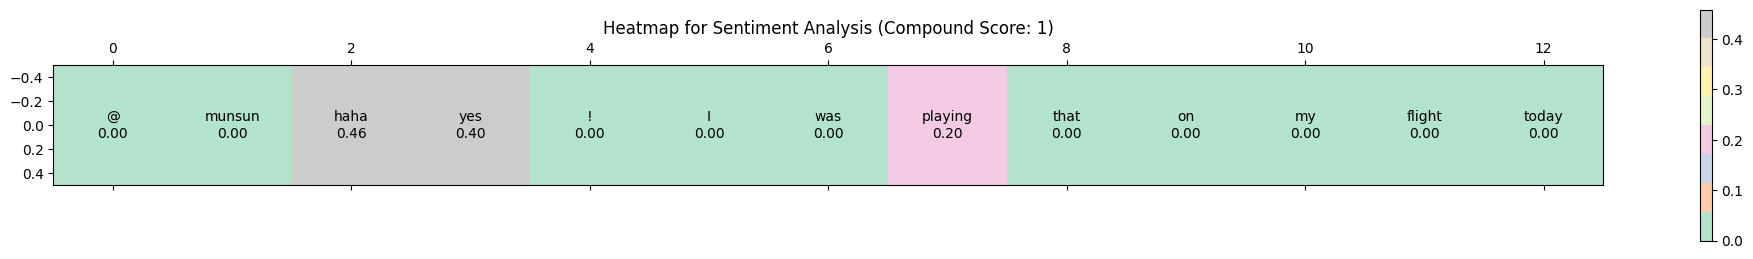

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

# Exemple de texte
text = data['text'].sample(1).iloc[0]

# Initialiser SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Obtenir les scores de polarité pour chaque mot dans la phrase
words = word_tokenize(text)
scores = [sia.polarity_scores(word)['compound'] for word in words]

# Convertir les scores en tableau numpy
x = np.array([scores])

# Calculer le score global avec un arrondi
polarity_scores1 = sia.polarity_scores(text)
compound_score = round((polarity_scores1['compound'] + 1) / 2)

print(f"Sentiment Analysis using NLTK: \n{text} => {polarity_scores1}")
print(f"Compound score (0 if negative, 1 if positive): {compound_score}")

# Créer la heatmap
fig, ax = plt.subplots(figsize=(25, 3))
cax = ax.matshow(x, cmap="Pastel2")

# Ajouter les annotations
for (i, j), val in np.ndenumerate(x):
    ax.text(j, i, f"{words[j]}\n{val:.2f}", ha='center', va='center')

# Ajouter une barre de couleur
fig.colorbar(cax)

# Ajouter un titre
plt.title(f'Heatmap for Sentiment Analysis (Compound Score: {compound_score})')
plt.show()


##### Fonction donnant le score sia depuis une colonne de dataframe

In [116]:
import numpy as np
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

def sentiment_scores(df, column_name):
    # Initialiser SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()
    
    # Fonction pour obtenir le score de polarité global pour une phrase
    def get_compound_score(text):
        polarity_scores = sia.polarity_scores(text)
        compound_score = round((polarity_scores['compound'] + 1) / 2)
        return compound_score
    
    # Appliquer la fonction à la colonne spécifiée du DataFrame
    scores = df[column_name].apply(get_compound_score)
    
    return scores

# Obtenir les scores de sentiment avec un seuil
scores_raw_text = sentiment_scores(data, "text")


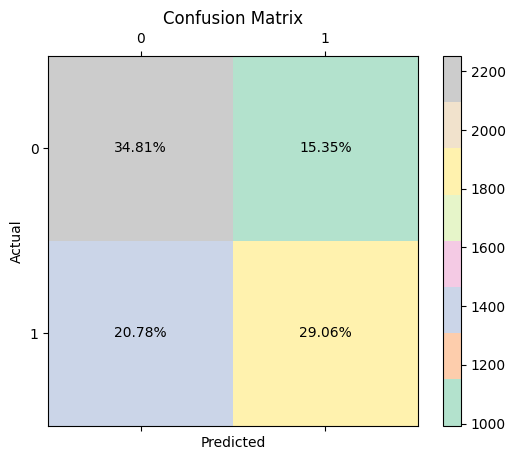

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.69      0.66      3245
           1       0.65      0.58      0.62      3224

    accuracy                           0.64      6469
   macro avg       0.64      0.64      0.64      6469
weighted avg       0.64      0.64      0.64      6469



In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Calculer la matrice de confusion
cm = confusion_matrix(data['target'], scores_raw_text)

# Afficher la matrice de confusion avec des couleurs pastel et des annotations en pourcentage
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap="Pastel2")

# Ajouter les annotations en pourcentage
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f"{val / cm.sum():.2%}", ha='center', va='center')

# Ajouter une barre de couleur
fig.colorbar(cax)

# Ajouter un titre
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Afficher le rapport de classification
report = classification_report(data['target'], scores_raw_text)
print("Classification Report:\n", report)


In [118]:
scores_preprocessed_text = sentiment_scores(data, "preprocessed_text")

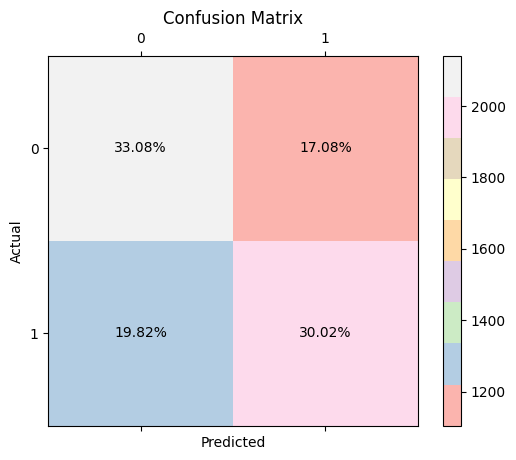

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.66      0.64      3245
           1       0.64      0.60      0.62      3224

    accuracy                           0.63      6469
   macro avg       0.63      0.63      0.63      6469
weighted avg       0.63      0.63      0.63      6469



In [119]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Calculer la matrice de confusion
cm = confusion_matrix(data['target'], scores_preprocessed_text)

# Afficher la matrice de confusion avec des couleurs pastel et des annotations en pourcentage
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap="Pastel1")

# Ajouter les annotations en pourcentage
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f"{val / cm.sum():.2%}", ha='center', va='center')

# Ajouter une barre de couleur
fig.colorbar(cax)

# Ajouter un titre
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Afficher le rapport de classification
report = classification_report(data['target'], scores_preprocessed_text)
print("Classification Report:\n", report)


#### Spacy TextBlob

In [120]:
import pandas as pd
from textblob import TextBlob

def analyse_sentiments_textblob(df, column_name):
    # Fonction pour obtenir le score de sentiment
    def get_sentiment_score(text):
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        score = round((polarity + 1) / 2)
        return score
    
    # Appliquer la fonction à la colonne spécifiée du DataFrame
    sentiment_score = df[column_name].apply(get_sentiment_score)
    
    return sentiment_score


scores_raw_textblob = analyse_sentiments_textblob(data, 'text')

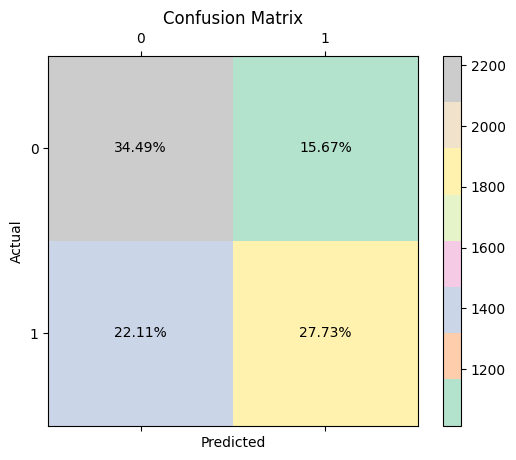

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.69      0.65      3245
           1       0.64      0.56      0.59      3224

    accuracy                           0.62      6469
   macro avg       0.62      0.62      0.62      6469
weighted avg       0.62      0.62      0.62      6469



In [121]:
# Calculer la matrice de confusion
cm = confusion_matrix(data['target'], scores_raw_textblob)

# Afficher la matrice de confusion avec des couleurs pastel et des annotations en pourcentage
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap="Pastel2")

# Ajouter les annotations en pourcentage
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f"{val / cm.sum():.2%}", ha='center', va='center')

# Ajouter une barre de couleur
fig.colorbar(cax)

# Ajouter un titre
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Afficher le rapport de classification
report = classification_report(data['target'], scores_raw_textblob)
print("Classification Report:\n", report)

<div class="alert alert-block alert-danger">
    <b>Le calcul de NLTK (utilisant VADER, outil spécifiquement élaboré pour l'analyse de tweets) est plus rapide et produit moins de faux négatifs que TextBlob. On peut bien sûr ajuster le seuil de détection pour les minimiser mais l'exactitude de prédiction restera au même niveau. Considérons plutôt qu'il s'agit d'une baseline. A noter également que VADER n'a pas besoin de l'ensemble des pré-traitements que nous avons effectués ; au contraire ils dégradent légèrement le résultat.</b>
</div>

In [122]:
data["sia_sentiment"] = scores_raw_text

### Préparation des données à la modélisation

Nous allons comparer les performances des modèles sur un échantillon que nous allons séparer en train/test et garder également 25 % des données pour un éventuel test complémentaire.

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Echantillonage
df_sample, test = train_test_split(data, test_size=0.25, stratify=data["target"])

In [124]:
df_sample.shape

(4851, 11)

In [125]:
# Séparation en train/test
train_df, test_df = train_test_split(df_sample, test_size=0.3, stratify=df_sample['target'])

print("Taille de l'ensemble d'entraînement :", len(train_df))
print("Taille de l'ensemble de test :", len(test_df))

Taille de l'ensemble d'entraînement : 3395
Taille de l'ensemble de test : 1456


In [126]:
train_df

,target,ids,date,flag,user,text,cleaned_text,tokenized,preprocessed_text,preprocessed_tokenized,sia_sentiment
293041,0,1996195392,Mon Jun 01 14:41:09 PDT 2009,NO_QUERY,Matik72,@geekandahalf Just found out via a tweet and quite sad as well. Not how I want to go at all. (re. lost Air France flight),<mention> Just found out via a tweet and quite sad as well. Not how I want to go at all. (re. lost Air France flight),"['<', 'mention', '>', 'Just', 'found', 'out', 'via', 'a', 'tweet', 'and', 'quite', 'sad', 'as', 'well', '.', 'Not', 'how', 'I', 'want', 'to', 'go', 'at', 'all', '.', '(', 're', '.', 'lost', 'Air', 'France', 'flight', ')']",< mention > found via tweet quite sad well want go ( lost air france flight ),"['<', 'mention', '>', 'found', 'via', 'tweet', 'quite', 'sad', 'well', 'want', 'go', '(', 'lost', 'air', 'france', 'flight', ')']",0
280462,0,1992058944,Mon Jun 01 08:07:47 PDT 2009,NO_QUERY,chrys,*Two* plane crashes?! A good start for a month in which I will presumably take something like 8 different planes,Plane crashes?! A good start for a month in which I will presumably take something like 8 different planes,"['Plane', 'crashes', '?', '!', 'A', 'good', 'start', 'for', 'a', 'month', 'in', 'which', 'I', 'will', 'presumably', 'take', 'something', 'like', '8', 'different', 'planes']",plane crash ? ! good start month presumably take something like 8 different plane,"['plane', 'crash', '?', '!', 'good', 'start', 'month', 'presumably', 'take', 'something', 'like', '8', 'different', 'plane']",1
1181323,1,1982066106,Sun May 31 10:27:31 PDT 2009,NO_QUERY,jbigga,What's your weight in killograms??? Twitter me your answer!!! I'm waiting for my flight!! &lt;3 goodbye America hello freedom!,What's your weight in killograms?? Twitter me your answer!! I am waiting for my flight!! Love goodbye America hello freedom!,"['What', ""'s"", 'your', 'weight', 'in', 'killograms', '?', '?', 'Twitter', 'me', 'your', 'answer', '!', '!', 'I', 'am', 'waiting', 'for', 'my', 'flight', '!', '!', 'Love', 'goodbye', 'America', 'hello', 'freedom', '!']",'s weight killograms ? ? twitter answer ! ! waiting flight ! ! love goodbye america hello freedom !,"[""'s"", 'weight', 'killograms', '?', '?', 'twitter', 'answer', '!', '!', 'waiting', 'flight', '!', '!', 'love', 'goodbye', 'america', 'hello', 'freedom', '!']",1
308021,0,2000603503,Mon Jun 01 22:29:55 PDT 2009,NO_QUERY,Bobbistarr,Very scared for the people on the Air France flight.,Very scared for the people on the Air France flight.,"['Very', 'scared', 'for', 'the', 'people', 'on', 'the', 'Air', 'France', 'flight', '.']",scared people air france flight,"['scared', 'people', 'air', 'france', 'flight']",0
378170,0,2052053534,Fri Jun 05 23:31:28 PDT 2009,NO_QUERY,lauralovesart,@markdavidson okay...cause yeah right now there are 4 of my plugins that won't upgrade...and they used to all automatically upgrade,<mention> okay.cause yeah right now there are 4 of my plugins that won't upgrade.and they used to all automatically upgrade,"['<', 'mention', '>', 'okay.cause', 'yeah', 'right', 'now', 'there', 'are', '4', 'of', 'my', 'plugins', 'that', 'wo', ""n't"", 'upgrade.and', 'they', 'used', 'to', 'all', 'automatically', 'upgrade']",< mention > okaycause yeah right 4 plugins wo n't upgradeand used automatically upgrade,"['<', 'mention', '>', 'okaycause', 'yeah', 'right', '4', 'plugins', 'wo', ""n't"", 'upgradeand', 'used', 'automatically', 'upgrade']",1
...,...,...,...,...,...,...,...,...,...,...,...
499104,0,2186422502,Mon Jun 15 18:49:04 PDT 2009,NO_QUERY,Tish50316,"Feels bad for Clay, hes stuck on the runway in Little Rock with no idea as to when his flight will take off","Feels bad for Clay, he's stuck on the runway in Little Rock with no idea as to when his flight will take off","['Feels', 'bad', 'for', 'Clay', ',', 'he', ""'s"", 'stuck', 'on', 'the', 'runway', 'in', 'Little', 'Rock', 'with', 'no', 'idea', 'as', 'to', 'when', 'his', 'flight', 'will', 'take', 'off']",feel bad clay 's stuck runway little rock i

In [127]:
# Sauvegarde des dataframe train et test
train_df.to_csv('./data/train_df.csv', index=True)
test_df.to_csv('./data/test_df.csv', index=True)